# Exploracion inicial de datos

In [163]:
#Imports
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from tqdm import tqdm as tqdm
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns

#### Carga del dataset

In [161]:
df = pd.read_csv('data/training_data.csv')
print(df.shape)
df.head()

(812, 3)


,Unnamed: 0,review,score
0,0,Era necesario mucho coraje para abordar aconte...,buena
1,1,Esperaba con curiosidad y ciertas ganas el est...,mala
2,2,"Wes Craven, convertido en factoría, nos vuelve...",mala
3,3,Va la gente y se rasga las vestiduras con 'Caó...,mala
4,4,Director: Mariano Ozores.Duración: 77 minutos....,buena


A primera vista se ve que es un dataset chico, con solo 812 comentarios de peliculas. Hay solo dos columnas con informacion, una que contiene el texto del comentario (review) y otra llamada "score" que contiene la calificacion del comentario.

### Campo score

El campo score será el objetivo de nuestro modelo, veamos cuantos posibles valores hay y la cantidad de los mismos.

In [5]:
df.score.value_counts()

buena    461
mala     351
Name: score, dtype: int64

Se ve que hay unicamente dos tipos de score, 'buena' y 'mala', y que si bien hay mayor cantidad de calificaciones buenas, en general el dataset esta bastante balanceado entre ambas.

### Analisis del campo review

Veamos primero algunos ejemplos de los comentarios.

In [164]:
pd.set_option('display.max_colwidth', 250)
df.review.iloc[:10]

0    Era necesario mucho coraje para abordar acontecimientos tan recientes y traumáticos para un país como los atentados del 11 de Septiembre para los EE.UU. Sólo por eso Paul Greengrass se merecía un aplauso por llevar a cabo "United 93". Pero es que...
1    Esperaba con curiosidad y ciertas ganas el estreno de la nueva película de Antonio Banderas como director. Su debut, "Crazy in Alabama" me parece una buena película, interesante y muy bien dirigida así que la intención de Banderas de contarnos un...
2    Wes Craven, convertido en factoría, nos vuelve a contar una prescindible historia con reiterativos elementos en los ya clásicos títulos de terror con y para jóvenes.Reincide en la idea de que los muertos están entre nosotros, más de lo que alguno...
3    Va la gente y se rasga las vestiduras con 'Caótica Ana', la nueva película de Julio Medem, el poeta del cine español, el rey del palíndromo. Que si irreconocible, que si chabacano, que si inconexo, que si ausente de sentido. no sé

Se ve que en general son comentarios bien redactados, con explicaciones detalladas y muy desarrolladas. Veamos como es la longitud de los comentarios en general.

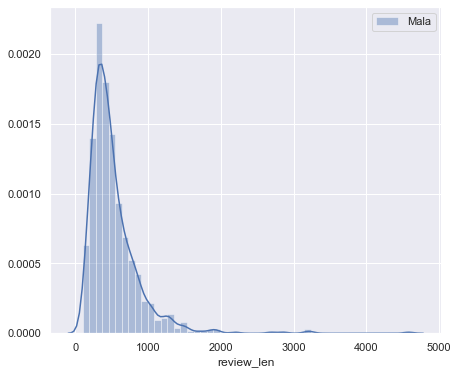

count     812.00000
mean      526.44335
std       375.31345
min        99.00000
25%       308.00000
50%       436.50000
75%       629.00000
max      4585.00000
Name: review_len, dtype: float64


In [166]:
df['review_len'] = df.review.apply(lambda x: len(x.split()))
sns.set(rc={'figure.figsize':(7,6)})
sns.distplot(df.review_len, hist=True, label='Mala')
plt.legend()
plt.show()
print(df.review_len.describe())

Se ve que los comentarios superan los 100 terminos y que la mayoria incliso supera los 400 terminos. Incluso hay comentarios muy largos que superan las 1000 palabras. Veamos algunos de los comentarios mar cortos para ver si la redaccion es similar a los vistos.

In [168]:
df[df.review_len < 120].review.iloc[:10]

20     Admiro a Michael Winterbottom, me encantó "Code 46" película que aun no se ha estrenado en España, sin embargo, cuando he visto esta película que apenas dura una hora y diez min. me he sentido bastante defraudado, creo que la última vez que me qu...
338    Me trago el insoportable bodrio de la pareja cómica menos pareja y menos cómica del panorama nacional.Menudo cúmulo de despropósitos esta secuela sin imaginación, sin guión. y sin localizaciones(!!!), aproximadamente el 90% del metraje es en inte...
659    Un filme tristísimo donde el ZOMBIE es utilizado como una enfermedad terminal que acaba con la vida de su protagonista, cada minuto se siente el calvario gracias a un sobresaliente "GILES ASPEN" Aunque no pierda la oportunidad del GORE, todo es u...
761    Esta película de reparto de campanillas con pretensiones de película de misterio (JA!), es lo peor que ha pasado por mi reproductor de DVD. sin gracia, sin línea argumental definida, con ocho mil tramas abiertas, con perso

La redaccion se mantiene similar a los vistos, detallada y bien descripta.

Veamos si hay alguna diferencia en las longitudes de comentarios positivos contra los negativos.

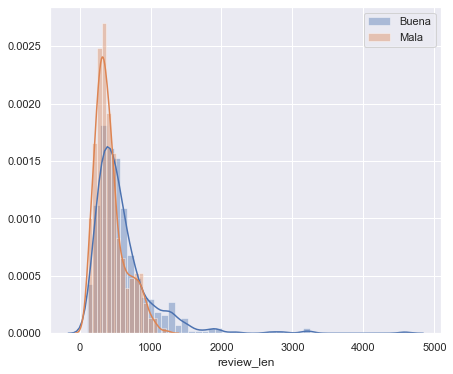

Describe de buenos
count     461.000000
mean      603.659436
std       446.832391
min        99.000000
25%       340.000000
50%       489.000000
75%       715.000000
max      4585.000000
Name: review_len, dtype: float64
None
Describe de malos
count     351.000000
mean      425.028490
std       214.047576
min       115.000000
25%       275.500000
50%       370.000000
75%       513.000000
max      1225.000000
Name: review_len, dtype: float64
None


In [174]:
sns.set(rc={'figure.figsize':(7,6)})
sns.distplot(df[df.score == 'buena'].review_len, hist=True, label='Buena')
sns.distplot(df[df.score == 'mala'].review_len, hist=True, label='Mala')
plt.legend()
plt.show()
print('Describe de buenos')
print(print(df[df.score == 'buena'].review_len.describe()))
print('Describe de malos')
print(print(df[df.score == 'mala'].review_len.describe()))

Si bien es bastante similar la distribucion de longitudes entre ambos tipos de calificacion, se ve una leve tendencia a que las calificaciones buenas sean mas largas, sobre todo en grandes longitudes.

Ahora veamos que pasa con la variedad de las palabras usadas en cada comentarios, para eso calcularemos la proporcion entre la cantidad de palabras diferente contra el total de palabras de un comentario. Podriamos hacerlo directamente contabilizando la cantidad de palabras diferentes, pero al haber una tendencia a tener comentarios buenos mas largos afectaria al resultado.

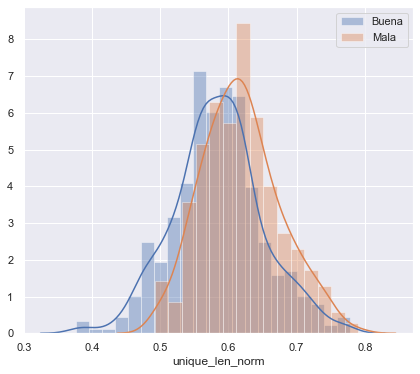

Describe de buenos
count    461.000000
mean       0.584737
std        0.065751
min        0.376445
25%        0.546667
50%        0.585317
75%        0.621622
max        0.777778
Name: unique_len_norm, dtype: float64
None
Describe de malos
count    351.000000
mean       0.618374
std        0.057435
min        0.492245
25%        0.578630
50%        0.615984
75%        0.653662
max        0.790541
Name: unique_len_norm, dtype: float64
None


In [180]:
df['unique_len_norm'] = df.review.apply(lambda x: len(set(x.split()))/len(x.split()))
sns.set(rc={'figure.figsize':(7,6)})
sns.distplot(df[df.score == 'buena'].unique_len_norm, hist=True, label='Buena')
sns.distplot(df[df.score == 'mala'].unique_len_norm, hist=True, label='Mala')
plt.legend()
plt.show()
print('Describe de buenos')
print(print(df[df.score == 'buena'].unique_len_norm.describe()))
print('Describe de malos')
print(print(df[df.score == 'mala'].unique_len_norm.describe()))

Se ve que hay una pequeña tendencia a que los comentarios malos tengan mas variedad de terminos, aunque no es una diferencia notable y es posible que se deba a que la muestra del dataset no es muy grande.

In [181]:
from nltk.corpus import stopwords
def get_top_n_words(corpus, n=None):
    """
    List the top n words in a vocabulary according to occurrence in a text corpus.
    """
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n], len(words_freq)

#### Vocabulario utilizado

Veamos primero el tamaño del vocabulario total y desagregado por score

In [189]:
freq_words, size = get_top_n_words(df.review)
print('Tamaño del vocabulario', size)

Tamaño del vocabulario 34421


Y cuales son en general las palabras mas utilizadas, quitamos las stopwords porque claramente son las que saldrian primero

In [195]:
[c for c in freq_words if c[0] not in list(stopwords.words('spanish'))][:10]

[('película', 2391),
 ('cine', 1353),
 ('si', 1202),
 ('ser', 945),
 ('historia', 945),
 ('tan', 730),
 ('film', 674),
 ('vez', 653),
 ('hace', 630),
 ('vida', 621)]

Claramente las palabras mas usadas son referencias equivalentes o sinonimos a las peliculas

In [190]:
n = get_top_n_words(df[df.score=='buena'].review)
print(f'Tamaño del vocabulario en comentarios positivos: {n[1]}')
print(f'Promedio de vocabulario por comentario: {round(n[1]/(df.score=="buena").sum(),1)}')

Tamaño del vocabulario en comentarios positivos: 26715
Promedio de vocabulario por comentario: 58.0


In [191]:
n = get_top_n_words(df[df.score=='mala'].review)
print(f'Tamaño del vocabulario en comentarios negativos: {n[1]}')
print(f'Promedio de vocabulario por comentario: {round(n[1]/(df.score=="mala").sum(),1)}')

Tamaño del vocabulario en comentarios negativos: 18641
Promedio de vocabulario por comentario: 53.1


Veamos si hay alguna diferencia destacable entre las palabras utilizadas por cometnarios positivas y negativos

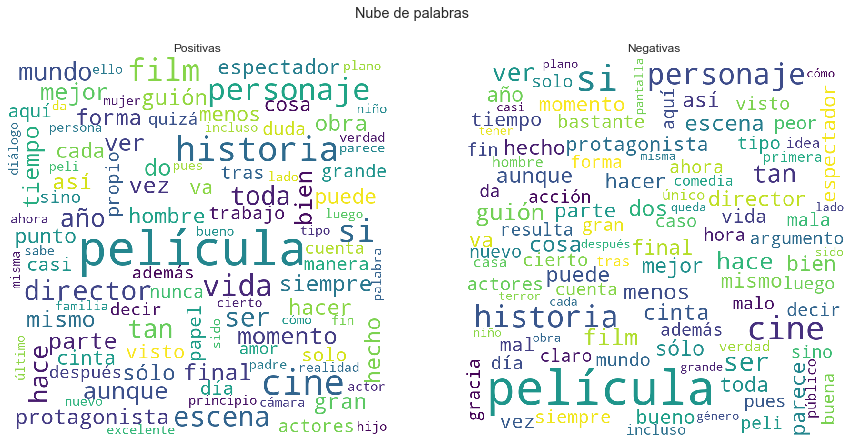

In [200]:
positive_words = ' '.join(df[df.score=='buena'].review)
negative_words = ' '.join(df[df.score=='mala'].review)
from wordcloud import WordCloud

stopword_set = list(stopwords.words('spanish'))
def plot_wordcloud(words, stopwords):
    wordcloud = WordCloud(width = 800, height = 800,
                    background_color ='white',
                    max_font_size=100,
                    max_words=100,
                    stopwords=list(stopwords),
                    min_font_size = 10).generate(words)

    # plot the WordCloud image                       
    return wordcloud
    
pos_img = plot_wordcloud(positive_words,stopword_set)
neg_img = plot_wordcloud(negative_words,stopword_set)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 7), facecolor = None)
fig.suptitle('Nube de palabras')
ax1.imshow(pos_img)
ax2.imshow(neg_img)
ax1.set_title('Positivas')
ax2.set_title('Negativas')
ax1.axis("off")
ax2.axis("off")
plt.show()

Si bien las palabras mas comunes aparecen mucho en ambos casos, se notan algunas deferencias en la aparicion de algunos calificativos en cada caso. Veamos de generarlo sin las palabras mas comunes para darle mas lugar a esas palabras.

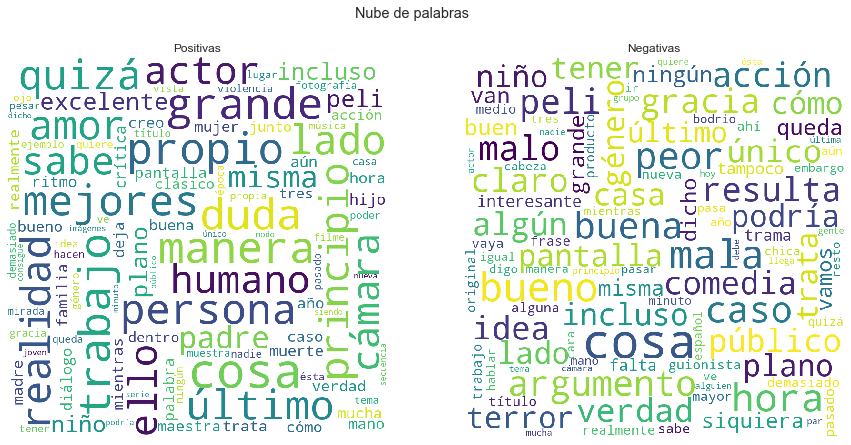

In [205]:
ignore_words = stopword_set + [c[0] for c in freq_words if c[0] not in list(stopwords.words('spanish'))][:80]

pos_img = plot_wordcloud(positive_words,ignore_words)
neg_img = plot_wordcloud(negative_words,ignore_words)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 7), facecolor = None)
fig.suptitle('Nube de palabras')
ax1.imshow(pos_img)
ax2.imshow(neg_img)
ax1.set_title('Positivas')
ax2.set_title('Negativas')
ax1.axis("off")
ax2.axis("off")
plt.show()

Del lado positivo, se puede ver como se destacan algunos calificativos como "mejores", "excelente". Tambien aparecen palabras podrian fomar parte de descripciones sobre la creacion de la pelicula, como "trabajo", "realidad", "manera", "propio". Tambien algunas referencias a cuestiones tecnicas como "actor", "camara" o "ritmo". 

En cambio, del lado negativo, vemos que se destacan algunos calificativos negativos como "mala", "malo", "peor" o "bodrio", aunque es curioso como palabras tipicamente positivas como "bueno" y "buena" se destacan mas que en los comentarios positivos. Tambien aparecen con mayor presencia referencias a generos de peliculas ("terror", "comedia", "accion" o incluso la palabra "genero"). Tambien se destaca la aparición de la palabra "argumento", que tambien se puede relacionar a otras palabras que aparecen como "trama".